In [9]:
import pettingzoo
import supersuit
import numpy as np
import time
import stable_baselines3
import gym_pybullet_drones

In [12]:
from stable_baselines3.common.env_util import make_vec_env

In [14]:
DEFAULT_SIMULATION_FREQ_HZ = 240
DEFAULT_CONTROL_FREQ_HZ = 48

In [28]:
import gym_pybullet_drones.envs

OBS_TYPE = gym_pybullet_drones.utils.enums.ObservationType('rgb')
ACT_TYPE = gym_pybullet_drones.utils.enums.ActionType('pid')
vec_env = make_vec_env(gym_pybullet_drones.envs.MultiHoverAviary, n_envs=1, seed=0,\
    env_kwargs={'obs': OBS_TYPE, 'act': ACT_TYPE, 'num_drones': 2, 'pyb_freq' : DEFAULT_SIMULATION_FREQ_HZ, 'ctrl_freq' : DEFAULT_CONTROL_FREQ_HZ})


[INFO] BaseAviary.__init__() loaded parameters from the drone's .urdf:
[INFO] m 0.027000, L 0.039700,
[INFO] ixx 0.000014, iyy 0.000014, izz 0.000022,
[INFO] kf 0.000000, km 0.000000,
[INFO] t2w 2.250000, max_speed_kmh 30.000000,
[INFO] gnd_eff_coeff 11.368590, prop_radius 0.023135,
[INFO] drag_xy_coeff 0.000001, drag_z_coeff 0.000001,
[INFO] dw_coeff_1 2267.180000, dw_coeff_2 0.160000, dw_coeff_3 -0.110000


C:\Users\abeea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\gymnasium\spaces\box.py:130: UserWarning: WARN: Box bound precision lowered by casting to float32
  gym.logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


In [25]:
import inspect

inspect.getmro(gym_pybullet_drones.envs.MultiHoverAviary)

(gym_pybullet_drones.envs.MultiHoverAviary.MultiHoverAviary,
 gym_pybullet_drones.envs.BaseRLAviary.BaseRLAviary,
 gym_pybullet_drones.envs.BaseAviary.BaseAviary,
 gymnasium.core.Env,
 typing.Generic,
 object)

In [29]:
vec_env.observation_space

Box(0, 255, (2, 48, 64, 4), uint8)

In [23]:
from stable_baselines3.common.env_checker import check_env

check_env(vec_env)

AssertionError: Your environment must inherit from the gymnasium.Env class cf. https://gymnasium.farama.org/api/env/

In [ ]:
marl_env = pettingzoo.

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import xarray as xr
import os

In [4]:
# path = "vmodel_datasets/neighbor_selection/pointmass/dist1"
# path = "vmodel_datasets/ref_distance_figure/dist1"
path = "vmodel_datasets/trajectories/pointmass/myopic"

In [5]:
path = "vmodel_datasets/trajectories/pointmass/myopic"
path = os.path.join(path, os.listdir(path)[0])

data = xr.open_dataset(path)
# print(path)

In [8]:
data.position.isel(agent = 0).values

array([[[-6.55690280e-01, -3.61856894e-02,  5.96916197e-01,
          1.18294868e+00,  1.75838914e+00,  2.37403767e+00,
          2.98980412e+00,  3.53287943e+00,  4.06036965e+00,
          4.56300373e+00,  5.05923964e+00,  5.54923232e+00,
          6.03203777e+00,  6.50983475e+00,  6.99282508e+00,
          7.49023970e+00,  8.01838290e+00,  8.52530666e+00,
          9.02053905e+00,  9.50851341e+00,  9.99207411e+00,
          1.04729756e+01,  1.09494870e+01,  1.14198704e+01,
          1.17635275e+01,  1.21174665e+01,  1.24938352e+01,
          1.28860599e+01,  1.33075331e+01,  1.37631024e+01,
          1.42271131e+01,  1.46980733e+01,  1.51764006e+01,
          1.56600220e+01,  1.61469815e+01,  1.66358694e+01,
          1.71261585e+01,  1.76111773e+01,  1.80893125e+01,
          1.85773712e+01,  1.90676374e+01,  1.95601862e+01,
          2.00523991e+01,  2.05440660e+01,  2.10337620e+01,
          2.15207716e+01,  2.20145245e+01,  2.25067258e+01,
          2.29980518e+01,  2.34895813e+0

In [6]:
path = "vmodel_datasets/neighbor_selection/pointmass/dist1/visual_myopic"
path = os.path.join(path, os.listdir(path)[0])

data = xr.open_dataset(path)

In [15]:
data

<xarray.Dataset> Size: 192MB
Dimensions:     (agent: 1000, run: 10, time: 200, nagents: 6)
Coordinates:
  * agent       (agent) int64 8kB 1 2 3 4 5 6 7 ... 994 995 996 997 998 999 1000
  * run         (run) int64 80B 1 2 3 4 5 6 7 8 9 10
  * time        (time) timedelta64[ns] 2kB 00:00:00 00:00:01 ... 00:03:19
  * nagents     (nagents) int64 48B 3 10 30 100 300 1000
Data variables:
    nndist      (nagents, run, time, agent) float64 96MB ...
    order       (nagents, run, time) float64 96kB ...
    union       (nagents, run, time) float64 96kB ...
    density     (nagents, run, time) float64 96kB ...
    traveldist  (nagents, run) float64 480B ...
    nvisible    (nagents, run, agent, time) float64 96MB ...
Attributes: (12/50)
    verbose:                 1
    file:                    
    plot:                    0
    plot_metrics:            0
    plot_every:              10
    plot_blocking:           0
    ...                      ...
    radius_safety:           1.0
    cohesion_gain:           1.0
    separation_gain:         0.5
    mean_area_per_agent:     3.141592653589793
    radius_arena:            1.7320508075688772
    radius_migration_point:  1.0

In [16]:
data.nvisible.isel(agent = 0, run = 0, nagents = 3).values

array([28.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  4.,  4.,  4.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
        5.,  5.,  5.,  5.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,
        6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,
        6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,
        6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  7.,  7.,  7.,  7.,  7.,
        7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,
        7.,  7.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
        8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
        8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
        8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8

In [19]:
data.nndist.isel(agent = 0, run = 0, nagents = 3).values

array([1.45587856, 1.44237308, 1.36399045, 1.27842166, 1.2414389 ,
       1.22366461, 1.14135472, 1.05779592, 1.05944985, 1.13023598,
       1.15715574, 1.17610244, 1.19175545, 1.21281231, 1.24264642,
       1.26772642, 1.28823345, 1.31428341, 1.34467385, 1.36328779,
       1.37760754, 1.38270278, 1.38229197, 1.39122978, 1.38308617,
       1.37477156, 1.36715497, 1.35567907, 1.34429207, 1.33561534,
       1.3298917 , 1.32629393, 1.32527021, 1.3194838 , 1.31463732,
       1.31343893, 1.31580296, 1.28459169, 1.27803477, 1.27748307,
       1.27715808, 1.27643084, 1.27931913, 1.29958901, 1.31445513,
       1.32324801, 1.32440108, 1.32274771, 1.32182595, 1.30196767,
       1.31188336, 1.34921167, 1.37692078, 1.39505152, 1.40922582,
       1.42559974, 1.39388102, 1.36469788, 1.34383793, 1.33250899,
       1.33262535, 1.33084832, 1.32827795, 1.3268796 , 1.32595466,
       1.32567116, 1.32521448, 1.32478879, 1.32429224, 1.30889942,
       1.30576759, 1.31287273, 1.30605057, 1.29996852, 1.26511

In [26]:
data_all = []

for folder in os.listdir(path):
    file = os.listdir(os.path.join(path, folder))[0]
    name = folder + '_' + file.split('.')[0]
    print(os.path.join(path, folder, file))

    data = xr.open_dataset(os.path.join(path, folder, file))

    data_all.append({'name': name, 'data': data})



vmodel_datasets/neighbor_selection/pointmass/dist1\metric\merged_num_agents.nc
vmodel_datasets/neighbor_selection/pointmass/dist1\visual\merged_num_agents.nc
vmodel_datasets/neighbor_selection/pointmass/dist1\visual_myopic\merged_num_agents.nc
vmodel_datasets/neighbor_selection/pointmass/dist1\visual_topo6\merged_num_agents.nc
vmodel_datasets/neighbor_selection/pointmass/dist1\visual_voronoi\merged_num_agents.nc


In [7]:
data_all[0]['data']

<xarray.Dataset> Size: 192MB
Dimensions:     (agent: 1000, run: 10, time: 200, nagents: 6)
Coordinates:
  * agent       (agent) int64 8kB 1 2 3 4 5 6 7 ... 994 995 996 997 998 999 1000
  * run         (run) int64 80B 1 2 3 4 5 6 7 8 9 10
  * time        (time) timedelta64[ns] 2kB 00:00:00 00:00:01 ... 00:03:19
  * nagents     (nagents) int64 48B 3 10 30 100 300 1000
Data variables:
    nndist      (nagents, run, time, agent) float64 96MB ...
    order       (nagents, run, time) float64 96kB ...
    union       (nagents, run, time) float64 96kB ...
    density     (nagents, run, time) float64 96kB ...
    traveldist  (nagents, run) float64 480B ...
    nvisible    (nagents, run, agent, time) float64 96MB ...
Attributes: (12/49)
    verbose:                 1
    file:                    
    plot:                    0
    plot_metrics:            0
    plot_every:              10
    plot_blocking:           0
    ...                      ...
    radius_safety:           1.0
    cohesion_gain:           1.0
    separation_gain:         0.5
    mean_area_per_agent:     3.141592653589793
    radius_arena:            1.7320508075688772
    radius_migration_point:  1.0

In [28]:
data_all[0]['data']['density'].isel(nagents = 0, run = 0).values

array([3.12389206, 8.49483264, 7.44910547, 6.95789474, 6.92937324,
       6.92824563, 6.92820476, 6.92820329, 6.92820323, 6.92820323,
       6.92820323, 6.92820323, 6.92820323, 6.92820323, 6.92820323,
       6.92820323, 6.92820323, 6.92820323, 6.92820323, 6.92820323,
       6.92820323, 6.92820323, 6.92820323, 6.92820323, 6.92820323,
       6.92820323, 6.92820323, 6.92820323, 6.92820323, 6.92820323,
       6.92820323, 6.92820323, 6.92820323, 6.92820323, 6.92820323,
       6.92820323, 6.92820323, 6.92820323, 6.92820323, 6.92820323,
       6.92820323, 6.92820323, 6.92820323, 6.92820323, 6.92820323,
       6.92820323, 6.92820323, 6.92820323, 6.92820323, 6.92820323,
       6.92820323, 6.92820323, 6.92820323, 6.92820323, 6.92820323,
       6.92820323, 6.92820323, 6.92820323, 6.92820323, 6.92820323,
       6.92820323, 6.92820323, 6.92820323, 6.92820323, 6.92820323,
       6.92820323, 6.92820323, 6.92820323, 6.92820323, 6.92820323,
       6.92820323, 6.92820323, 6.92820323, 6.92820323, 6.92820

In [34]:
import numpy as np
from gymnasium import spaces
import scipy
from pprint import pprint
import matplotlib.pyplot as plt
import pandas as pd

In [41]:
def pretty_print(arr):
    '''
        arr : multi-dimensional array
    '''
    df = pd.DataFrame(arr)
    df.columns = [str(i) for i in range(len(arr[0]))]
    pprint(df)

In [39]:
np.set_printoptions(edgeitems=30, linewidth=100000, 
    formatter=dict(float=lambda x: "%.3g" % x))
pd.set_option('display.max_columns', 500)

In [3]:
list(spaces.Dict({"key": spaces.Box(low = -1, high = 1, shape = (2, ))}).keys())

['key']

In [4]:
positions = np.random.uniform(-1, 1, (10, 2))
positions

array([[-0.77995157, -0.67289253],
       [ 0.63473511,  0.37058601],
       [ 0.25333029,  0.40194935],
       [ 0.33558293, -0.43350454],
       [ 0.23634641, -0.30437308],
       [-0.61838233,  0.81866435],
       [ 0.66819575,  0.65545497],
       [ 0.83818562,  0.96767279],
       [ 0.2383983 , -0.45554335],
       [ 0.60805974, -0.62397064]])

In [42]:
piecewise_relatives = positions[:, None, :] - positions[None, :, :]
# plt.matshow(piecewise_relatives[:, :, 0])
# plt.matshow(piecewise_relatives[:, :, 1])
(piecewise_relatives[:, :, 0])
pretty_print(piecewise_relatives[:, :, 0])

          0         1         2         3         4         5         6  \
0  0.000000 -1.414687 -1.033282 -1.115534 -1.016298 -0.161569 -1.448147   
1  1.414687  0.000000  0.381405  0.299152  0.398389  1.253117 -0.033461   
2  1.033282 -0.381405  0.000000 -0.082253  0.016984  0.871713 -0.414865   
3  1.115534 -0.299152  0.082253  0.000000  0.099237  0.953965 -0.332613   
4  1.016298 -0.398389 -0.016984 -0.099237  0.000000  0.854729 -0.431849   
5  0.161569 -1.253117 -0.871713 -0.953965 -0.854729  0.000000 -1.286578   
6  1.448147  0.033461  0.414865  0.332613  0.431849  1.286578  0.000000   
7  1.618137  0.203451  0.584855  0.502603  0.601839  1.456568  0.169990   
8  1.018350 -0.396337 -0.014932 -0.097185  0.002052  0.856781 -0.429797   
9  1.388011 -0.026675  0.354729  0.272477  0.371713  1.226442 -0.060136   

          7         8         9  
0 -1.618137 -1.018350 -1.388011  
1 -0.203451  0.396337  0.026675  
2 -0.584855  0.014932 -0.354729  
3 -0.502603  0.097185 -0.272477  
4 -0

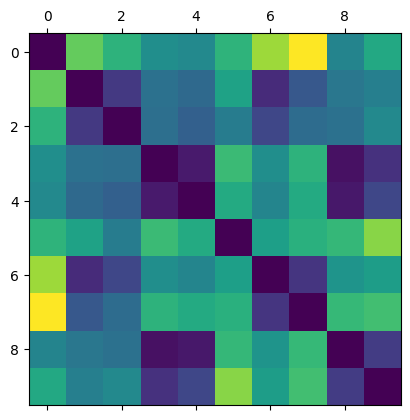

In [22]:
distance = np.linalg.norm(piecewise_relatives, axis = -1)
plt.matshow(distance)

In [39]:
distance = scipy.spatial.distance.pdist(positions)
distance

array([1.80325113, 1.47862984, 2.00940474, 2.33547438, 0.89564253,
       1.65533176, 1.26964209, 0.15338118, 0.97984209, 0.50028332,
       0.22496233, 0.95951286, 0.96706375, 0.59135886, 1.7559621 ,
       1.93451723, 1.34592718, 0.62015596, 0.90558378, 0.8126879 ,
       0.23522182, 1.25589074, 1.62442146, 0.85985168, 0.81050262,
       1.18864928, 0.62839873, 1.8562766 , 2.14401138, 1.47966887,
       1.71431908, 0.68983016, 1.68823293, 2.48668752, 1.50307913,
       1.04356129, 1.4512466 , 1.0056724 , 0.97298185, 1.24174956,
       1.80493685, 0.91637028, 1.39842817, 0.48230025, 1.12879836])

In [7]:

a = np.random.uniform(1, 1, size = (3, 2))
na = np.linalg.norm(a, axis = 1)

a / na[:, None]

array([[0.70710678, 0.70710678],
       [0.70710678, 0.70710678],
       [0.70710678, 0.70710678]])

In [5]:
keys = (f"key_{i}" for i in range(4))
a = np.random.uniform(-10, 10, size = (3, 2))
b = np.random.uniform(-10, 10, size = (3, 2))
c = np.random.uniform(-10, 10, size = (3, 2))
d = np.random.uniform(-10, 10, size = (3, 2))

bool((np.linalg.norm(np.abs(a - a[:, None]), axis = 2) < 12).any())

obs = {key: }
    

np.concatenate((a[:, None, :], b[:, None, :], c[:, None, :], d[:, None, :]), axis = 1)
comb = np.stack((a, b, c, d), axis=1)
{key: comb[:, i, :] for i, key in enumerate(keys)}
comb

array([[[-2.42084516,  4.35243095],
        [-1.8118524 , -4.06179309],
        [ 7.02883289, -1.67030242],
        [ 7.50254543, -7.16220157]],

       [[ 6.82755634, -1.34594924],
        [ 6.28252108, -5.59863146],
        [ 9.58792524,  4.21940767],
        [-0.57320769, -6.43759148]],

       [[-5.08016517,  3.85766803],
        [-9.65877601, -5.07290066],
        [-6.91273639, -5.31247579],
        [-1.66363289, -5.43025225]]])

In [21]:
def normalize(x):
    length = np.linalg.norm(x, axis = 1, keepdims = True)
    length[length == 0] = 1

    return x / length

In [31]:
vec = np.array([[1, 1], [3, 4], [0, 1]])
vec2 = np.array([[1, 1], [-3, -4], [1, 0]])

norminp = normalize(vec)
normlen = normalize(vec2)

angle = np.zeros((vec.shape[0], 1))
for i in range(vec.shape[0]):
    angle[i] = np.dot(norminp[i], normlen[i])

angle

array([[ 1.],
       [-1.],
       [ 0.]])